##Importing the Data

In [0]:
from tensorflow.python.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [12]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [13]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


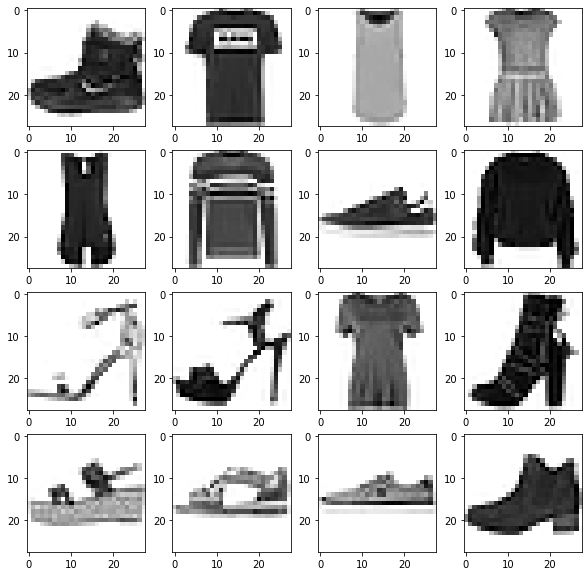

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize= (10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i], cmap = 'binary')
plt.show()

##Processing the Data

In [15]:
from tensorflow.keras.utils import  to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
import numpy as np
x_train = np.reshape(x_train, (60000,28*28))
x_test = np.reshape(x_test, (10000, 28*28))

x_train = x_train/255.
y_test = y_test/255.

##Creating the Experiment Part 1

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

nodes = 64

def create_model(weight_reg = False, dropout_reg = False):
  model = Sequential()
  if weight_reg:
    model.add(Dense(nodes, activation = 'relu',
                    input_shape = (784,),
                    kernel_regularizer = l2(0.0008)))
    model.add(Dense(nodes, activation = 'relu', kernel_regularizer = l2(0.0008)))
  else:
    model.add(Dense(nodes, activation = 'relu', input_shape = (784,)))
    model.add(Dense(nodes, activation ='relu'))
  
  if dropout_reg:
    model.add(Dropout(0.7))
  model.add(Dense(10, activation = 'softmax'))

  model.compile(
      loss= 'categorical_crossentropy', 
      optimizer = 'adam',
      metrics = ['accuracy']
  )

  model.summary()
  return model





##Creating the Experiment Part 2


In [0]:
def show_acc(h, E):
  plt.plot(range(E), h.history['accuracy'])
  plt.plot(range(E), h.history['val_accuracy'])
  plt.ylim([0.7,1.0])
  plt.legend()
  plt.show()
  return

In [0]:
from tensorflow.keras.callbacks import LambdaCallback



def run_experiment(E = 20, weight_reg = False, dropout_reg = False):
  m = create_model(weight_reg, dropout_reg)

  h = m.fit(
      x_train, y_train,
      epochs = E, verbose = True,
      validation_data = (x_test, y_test)
  )

  show_acc(h, E)
  return



##Without regularization

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5103 - accuracy: 0.8204 - val_loss: 0.2288 - val_accuracy: 0.8378
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3792 - accuracy: 0.8618 - val_loss: 0.2504 - val_accuracy: 0.8236
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3407 - accurac

No handles with labels found to put in legend.


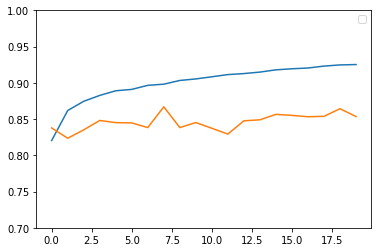

In [44]:
run_experiment()

##With regularization

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8000 - accuracy: 0.7195 - val_loss: 0.2410 - val_accuracy: 0.8092
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5685 - accuracy: 0.8019 -

No handles with labels found to put in legend.


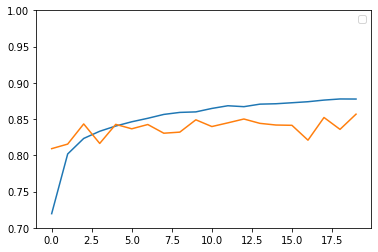

In [60]:
run_experiment(dropout_reg= True)